In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Define the URL of the Trustpilot page you want to scrape
base_url = "https://www.trustpilot.com/review/www.airbnb.com"

# Create a CSV file and write headers
with open('airbnb.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Reviewer Name', 'Stars Rating', 'Review Title', 'Review Content', 'Date of Experience'])

    # Create a function to scrape data from one page
    def scrape_page(url):
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            review_containers = soup.find_all("article", class_="paper_paper__1PY90")

            for review in review_containers:
                # Extract reviewer's name
                reviewer_name = review.find("span", class_="typography_heading-xxs__QKBS8 typography_appearance-default__AAY17").text

                # Extract number of stars rating
                stars_rating_element = review.find("img", alt="Rated 1 out of 5 stars")
                if stars_rating_element:
                    stars_rating = stars_rating_element["src"].split("/")[-1].split(".")[0]
                else:
                    stars_rating = "N/A"  # Handle the case when stars rating is not found

                # Extract review title
                review_title = review.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text

                # Extract review content
                review_content = review.find("p", class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn").text

                # Extract date of experience
                date_of_experience_element = review.find("p", class_="typography_body-m__xgxZ_")
                date_of_experience = date_of_experience_element.text.split(":")[-1].strip() if date_of_experience_element else "N/A"

                # Write the data to the CSV file
                csv_writer.writerow([reviewer_name, stars_rating, review_title, review_content, date_of_experience])

    # Scrape the first page (you can call this function in a loop to scrape multiple pages)
    scrape_page(base_url)

print("Data has been saved to airbnb.csv.")




Data has been saved to airbnb.csv.


In [ ]:
import pandas as pd

df = pd.read_csv('airbnb.csv')

In [ ]:
df.head()

,Reviewer Name,Stars Rating,Review Title,Review Content,Date of Experience
0,Andy,stars-1,Traumatic Customer Support,Using Air BnB is okay until something goes wro...,"October 25, 2023"
1,Olav-Magnus Christoffersen,NaN,We have used Airbnb for more than 2…,We have used Airbnb for more than 2 years as h...,"November 07, 2023"
2,Helen Cunningham,stars-1,Terrible customer service!,Air bnb is very biased and will always side wi...,"October 19, 2023"
3,customer,stars-1,Airbnb cancelled my reservation over Xmas…,Airbnb cancelled my reservation over the Chris...,"November 07, 2023"
4,Míša Karkošová,NaN,My airbnb host was arrested by police…,My airbnb host was arrested by police so I had...,"April 28, 2023"


Data Preprocessing

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Reviewer Name         0
Stars Rating          0
Review Title          0
Review Content        0
Date of Experience    0
dtype: int64


In [ ]:
df['Stars Rating'].fillna('N/A', inplace=True)


convert data types

In [ ]:
# Convert 'Date of Experience' to datetime
df['Date of Experience'] = pd.to_datetime(df['Date of Experience'], format='%B %d, %Y')

# Verify the data type conversion
print("Data Types:\n", df.dtypes)


Data Types:
 Reviewer Name                 object
Stars Rating                  object
Review Title                  object
Review Content                object
Date of Experience    datetime64[ns]
dtype: object


clean text data

In [ ]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

# Define a function to clean text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Join the cleaned words
    cleaned_text = ' '.join(words)

    return cleaned_text

# Clean the 'Review Content' column
df['Review Content'] = df['Review Content'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data **Analysis**

In [ ]:
# Display summary statistics for numeric columns
numeric_summary = df['Stars Rating'].describe()
print("Summary Statistics for Stars Rating:\n", numeric_summary)


Summary Statistics for Stars Rating:
 count          20
unique          2
top       stars-1
freq           17
Name: Stars Rating, dtype: object


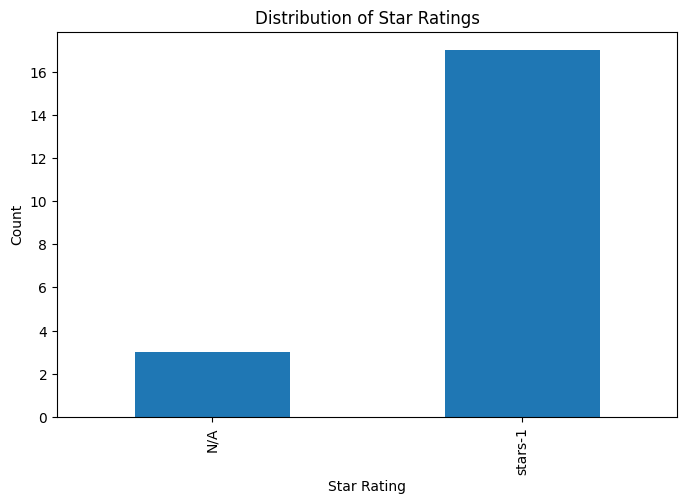

In [ ]:
# Star ratings distribution

import matplotlib.pyplot as plt

# Plot the distribution of star ratings
plt.figure(figsize=(8, 5))
df['Stars Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


# Sentimental Analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis and return sentiment scores
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    sentiment_score = sentiment['compound']
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to the 'Review Content' column and create a new column 'Sentiment'
df['Sentiment'] = df['Review Content'].apply(analyze_sentiment)

# Display a sample of the sentiment analysis results
sample_sentiments = df[['Review Content', 'Sentiment']].head(10)
print(sample_sentiments)


                                      Review Content Sentiment
0  Using Air BnB okay something goes wrong suppor...  Negative
1  used Airbnb 2 years host selective guests choo...  Negative
2  Air bnb biased always side hosts travel adviso...  Positive
3  Airbnb cancelled reservation Christmas told au...  Positive
4  airbnb host arrested police search new place s...  Negative
5  Remodeled apartment view ocean almost private ...  Negative
6  Booked paid booking cancelled explanation apar...  Negative
7  hold Airbnb customer service 1 hour 40 minutes...  Negative
8  Reviews posted Airbnb unreliable recently sear...  Positive
9  think time company banned Appalling customer s...  Negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


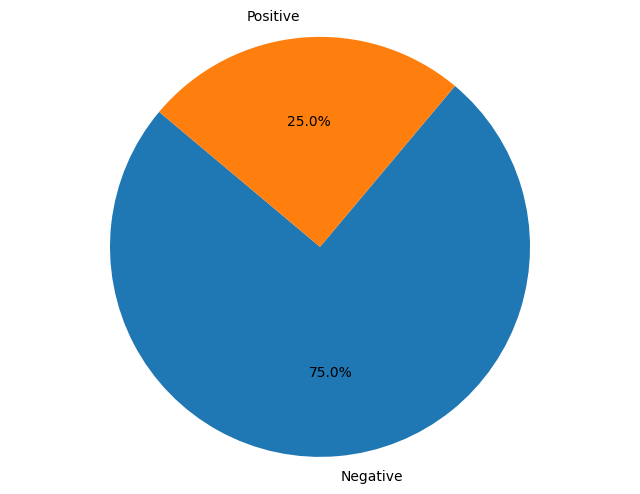

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reviews for each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Sentiments in Airbnb Customer Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


Text Analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


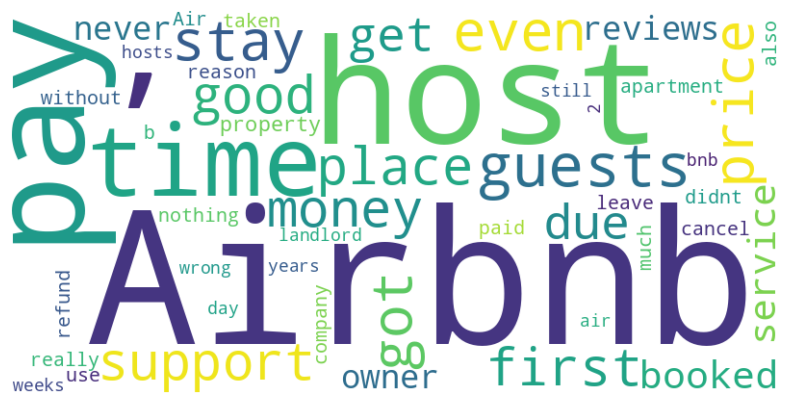

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize the review content
nltk.download('punkt')
reviews_text = " ".join(df['Review Content'])
tokens = word_tokenize(reviews_text)

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(freq_dist)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Most Frequent Words in Airbnb Customer Reviews')
plt.show()


<Figure size 1200x600 with 0 Axes>

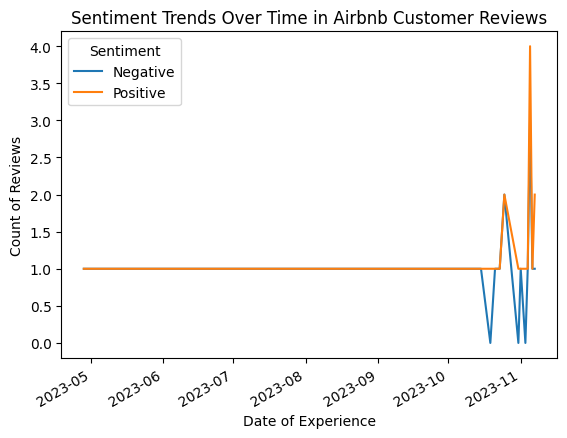

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by the 'Date of Experience' column in ascending order
df = df.sort_values(by='Date of Experience')

# Group the data by date and sentiment to calculate sentiment counts over time
sentiment_counts = df.groupby(['Date of Experience', 'Sentiment']).size().unstack(fill_value=0)

# Create a line plot to visualize sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='line', stacked=True)
plt.title('Sentiment Trends Over Time in Airbnb Customer Reviews')
plt.xlabel('Date of Experience')
plt.ylabel('Count of Reviews')
plt.legend(title='Sentiment')
plt.show()


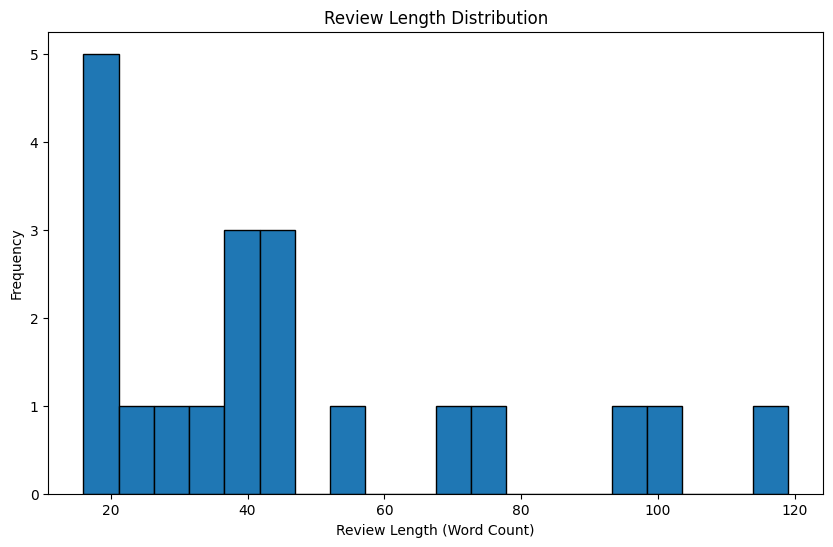

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the word count for each review
df['Review Length'] = df['Review Content'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Review Length'], bins=20, edgecolor='k')
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Frequency')
plt.title('Review Length Distribution')
plt.show()
